### **Chapter 4: Image Enhancement**

#### Ex. 3: Implement Floyd-Steinberg error-diffusion dithering using the algorithm described here https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_ dithering and convert a grayscale image into a binary image
---

#### 1. Import các thư viện cần thiết

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

#### 2. Đọc ảnh và chuyển ảnh sang ảnh xám

In [3]:
im = rgb2gray(imread('lena.jpg'))*255

- imread đọc ảnh, rgb2gray chuyển ảnh màu sang ảnh xám. Sau đó nhân với 255 để các giá trị pixel nằm trong khoảng [0, 255].

#### 3. Xây dựng hàm chuyển đổi về ảnh nhị phân (chỉ có 2 màu đen và trắng)

In [4]:
def find_closest_palette_color(oldpixel):
    return int(round(oldpixel / 255)*255)

- Hàm find_closest_palette_color có tác dụng là làm tròn giá trị của một pixel về gần nhất với các giá trị trong bảng màu. Giúp chuyển đổi ảnh gốc thành ảnh nhị phân chỉ có 2 màu đen và trắng
- Ví dụ:
    - Nếu oldpixel = 100, khi chia và làm tròn, nó sẽ gần 0, vì vậy kết quả là 0 (màu đen).
    - Nếu oldpixel = 200, sau khi làm tròn, kết quả sẽ là 255 (màu trắng).

#### 4. Khởi tạo ảnh và các tham số

In [5]:
pixel = np.copy(im)
w, h = im.shape

- Tạo ma trận ảnh pixel là bản sao của ma trận ảnh gốc
- w, h lần lượt là kích thước của ảnh (w là chiều rộng, h là chiều cao).

#### 5. Áp dụng thuật toán Floyd-Steinberg Dithering vào ảnh

In [6]:
for y in range(h):
    for x in range(w):
        oldpixel = pixel[x][y]
        newpixel = find_closest_palette_color(oldpixel)
        pixel[x][y] = newpixel
        quant_error = oldpixel - newpixel
        if x < w-1:
           pixel[x + 1][y] = pixel[x + 1][y] + quant_error * 7 / 16
        if x > 0 and y < h-1:
           pixel[x - 1][y + 1] = pixel[x - 1][y + 1] + quant_error * 3 / 16
        if y < h-1:
           pixel[x ][y + 1] = pixel[x ][y + 1] + quant_error * 5 / 16
        if x < w-1 and y < h-1:
           pixel[x + 1][y + 1] = pixel[x + 1][y + 1] + quant_error * 1 / 16


- Thuật toán dithering chia phần lỗi lượng tử (quant_error) giữa các pixel lân cận.
    - oldpixel là giá trị pixel gốc.
    - newpixel là giá trị pixel sau khi áp dụng find_closest_palette_color, có thể là 0 hoặc 255.
    - quant_error là sai số (sự khác biệt) giữa oldpixel và newpixel.
    - Lỗi này sau đó được phân phối cho các pixel xung quanh theo các tỷ lệ nhất định (7/16, 3/16, 5/16, 1/16). Điều này giúp tạo ra một hiệu ứng mờ dần, nơi các pixel không phải lúc nào cũng chuyển trực tiếp sang 0 hoặc 255, mà có sự pha trộn giữa các màu.

#### 6. Hiển thị ảnh gốc và ảnh sau khi dithering

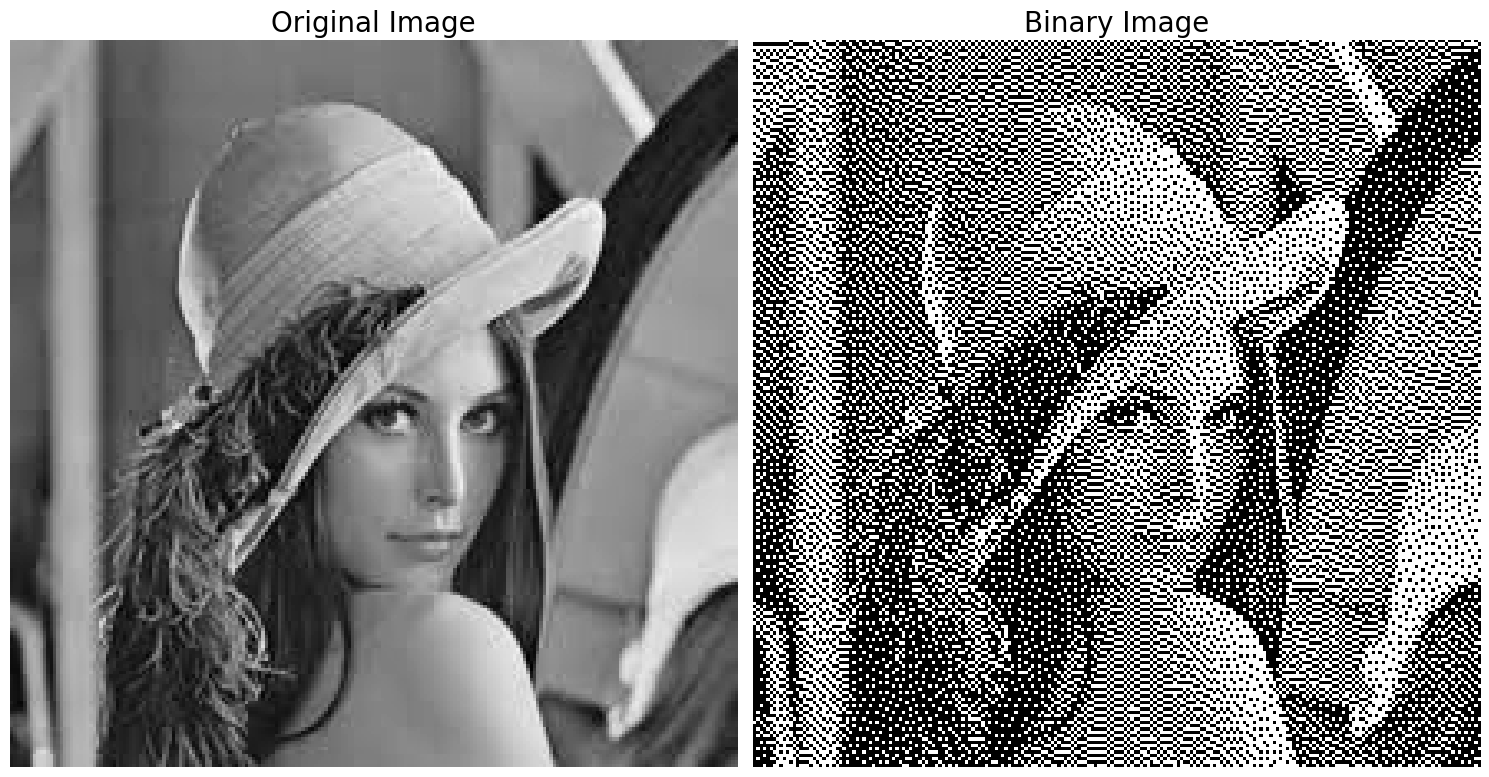

In [7]:
plt.figure(figsize=(15,20))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Image', size=20)
plt.subplot(122)
plt.imshow(pixel, cmap='gray')
plt.axis('off')
plt.title('Binary Image', size=20)
plt.tight_layout()
plt.show()

- plt.subplot(121): Hiển thị ảnh gốc ở bên trái.
- plt.subplot(122): Hiển thị ảnh nhị phân (sau khi áp dụng dithering) ở bên phải.
- plt.tight_layout(): Tự động điều chỉnh bố cục để tránh chồng chéo các phần tử của biểu đồ.
- plt.show(): Hiển thị các biểu đồ.